In [174]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt

In [175]:
df = pd.read_csv("European_citiznes_rsvp.csv")
df.head()

,COUNTRY,SEX,YEAR,life_expectancy,average_number_of_calories_available_per_person_per_day,unemployment_rate,regular_daily_smokers,adult_overweight,alcahol_consumption_liter_per_capita,fat_available_ppd,protein_ppd,average_fruit_vegtable_ppd,annual_income,youth_unemployment_rate,Ischaemic_heart_diseas,circulatory_diseases,self_injury,total_hospital_beds
0,Austria,ALL,2000.0,78.47,2223.0,5.6,29.5,33.3,1.17,44.85,66.11,128.80,700.0,16.72,23.22,3353.71,1.52,11411.0
1,Austria,ALL,2001.0,78.95,2242.0,5.1,40.1,33.8,0.91,46.06,66.12,121.44,730.0,48.34,23.82,3411.79,1.65,11411.0
2,Austria,ALL,2002.0,79.01,2156.0,3.6,24.7,34.2,1.04,43.14,64.58,115.27,730.0,40.51,26.04,3464.58,2.50,11578.0
3,Austria,ALL,2003.0,78.89,2270.0,4.4,34.9,34.7,1.04,48.29,65.59,127.38,760.0,33.46,25.26,2825.93,4.53,11610.0
4,Austria,ALL,2004.0,79.43,2254.0,5.7,39.0,35.1,1.03,44.41,66.63,120.52,650.0,23.42,21.33,2569.84,6.34,12006.0


In [176]:
# filterByYear = df[df["YEAR"]==2000]
filterByYear = df
filterByYear[["COUNTRY","YEAR","life_expectancy"]].head()

,COUNTRY,YEAR,life_expectancy
0,Austria,2000.0,78.47
1,Austria,2001.0,78.95
2,Austria,2002.0,79.01
3,Austria,2003.0,78.89
4,Austria,2004.0,79.43


In [177]:
from sklearn.cluster import KMeans
import numpy as np

X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(filterByYear[["life_expectancy","life_expectancy"]])
kmeans.labels_
#kmeans.predict([[0, 0], [12, 3]])
kmeans.cluster_centers_

array([[78.16789474, 78.16789474],
       [73.69084507, 73.69084507],
       [81.55204082, 81.55204082]])

In [178]:
from sklearn.cluster import KMeans

y_pred = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(filterByYear[["YEAR","life_expectancy"]])
y_pred.predict(filterByYear[["YEAR","life_expectancy"]])
filterByYear["cluster"] = y_pred.labels_
filterByYear[["COUNTRY","YEAR","life_expectancy","cluster"]].head()

y_pred.cluster_centers_[:,1]
# y_pred.labels_

array([76.25561497, 80.1559322 , 79.19412371])

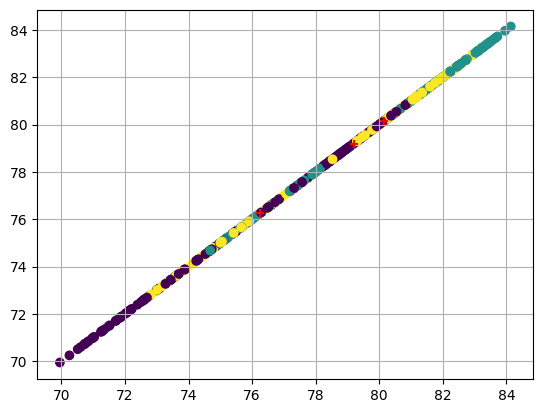

In [179]:
fig, ax = plt.subplots()
ax.scatter(filterByYear["life_expectancy"], filterByYear["life_expectancy"], c=filterByYear["cluster"])
ax.scatter(y_pred.cluster_centers_[:,1], y_pred.cluster_centers_[:,1], c='red', marker='+')
ax.grid(True)

plt.show()

In [180]:
forExport = filterByYear
labels = ['LOW','MEDIUM','HIGH']

def clusterToLabel(centers):
    labelMap = []
    # for c in arr:
    # centers = np.array([2.5, -1.2, 0.7])  # cluster 0,1,2
    sorted_labels = np.argsort(centers)       # array([1,2,0]) low->high
    rank_map = {int(lbl): rank for rank, lbl in enumerate(sorted_labels, start=0)}  # {1:1,2:2,0:3}
    # labels: array of shape (n_samples,) with cluster ids
    labels = np.array([0,0,1,2,1,2])
    # print(rank_map)
    return rank_map

clusterToLabel([0.5, 3, 2])

{0: 0, 2: 1, 1: 2}

life_expectancy


/home/viereck/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


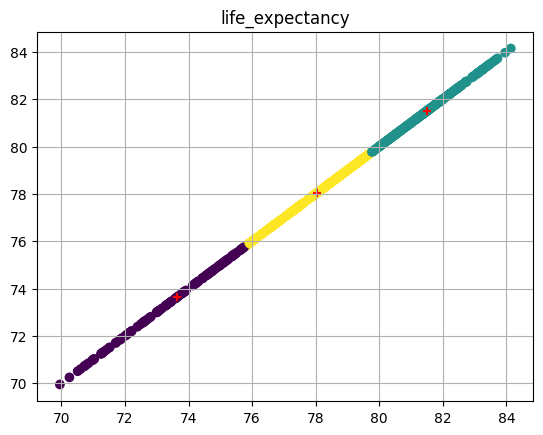

/tmp/ipykernel_17805/1766679979.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forExport[series_name][i] = labels[relab.get(forExport['cluster'][i])]
/home/viereck/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


average_number_of_calories_available_per_person_per_day


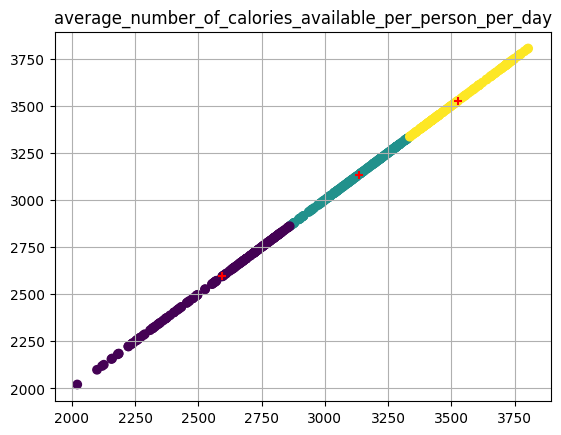

/tmp/ipykernel_17805/1766679979.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forExport[series_name][i] = labels[relab.get(forExport['cluster'][i])]
/home/viereck/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


unemployment_rate


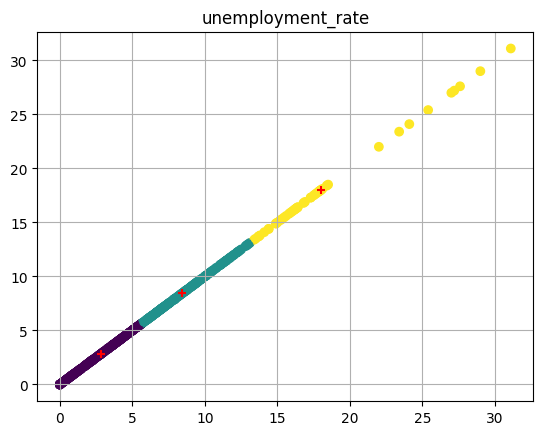

/tmp/ipykernel_17805/1766679979.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forExport[series_name][i] = labels[relab.get(forExport['cluster'][i])]
/home/viereck/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


regular_daily_smokers


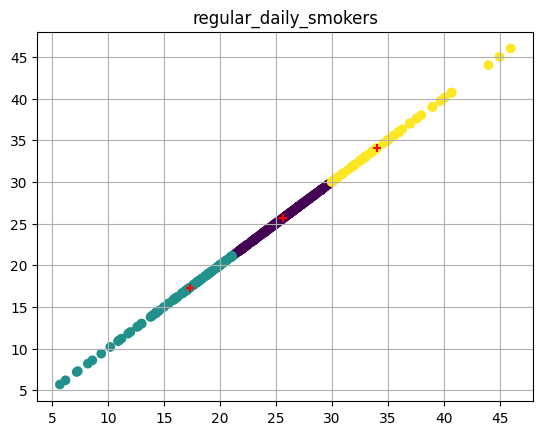

/tmp/ipykernel_17805/1766679979.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forExport[series_name][i] = labels[relab.get(forExport['cluster'][i])]
/home/viereck/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


adult_overweight


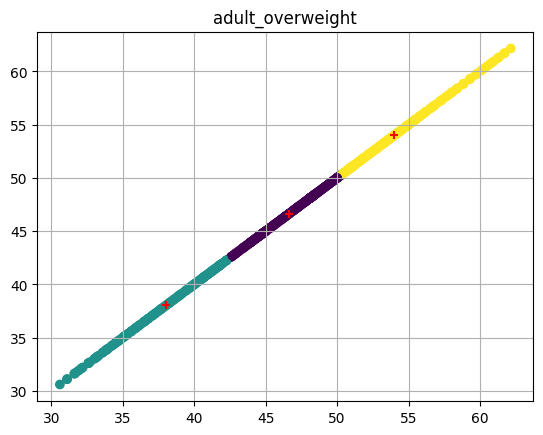

/tmp/ipykernel_17805/1766679979.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forExport[series_name][i] = labels[relab.get(forExport['cluster'][i])]
/home/viereck/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


alcahol_consumption_liter_per_capita


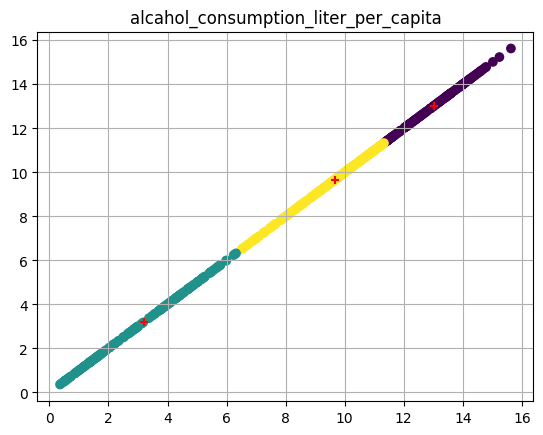

/tmp/ipykernel_17805/1766679979.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forExport[series_name][i] = labels[relab.get(forExport['cluster'][i])]
/home/viereck/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


fat_available_ppd


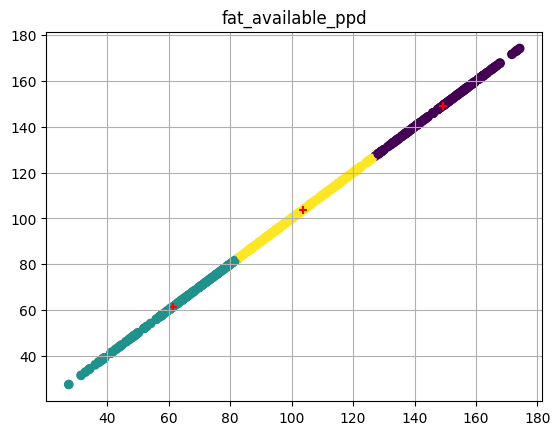

protein_ppd


/tmp/ipykernel_17805/1766679979.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forExport[series_name][i] = labels[relab.get(forExport['cluster'][i])]
/home/viereck/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


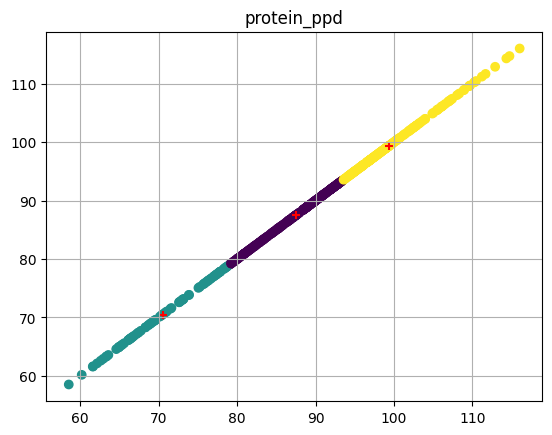

/tmp/ipykernel_17805/1766679979.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forExport[series_name][i] = labels[relab.get(forExport['cluster'][i])]
/home/viereck/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


average_fruit_vegtable_ppd


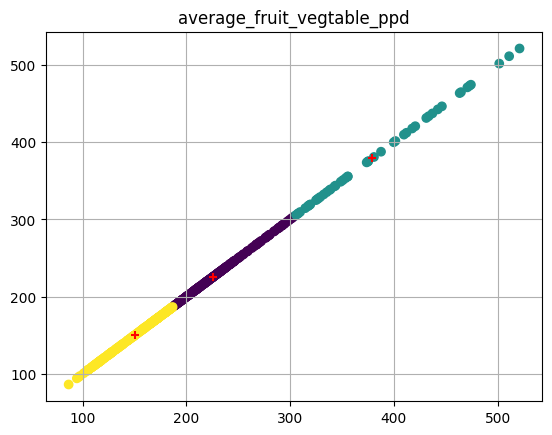

/tmp/ipykernel_17805/1766679979.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forExport[series_name][i] = labels[relab.get(forExport['cluster'][i])]


annual_income


/home/viereck/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


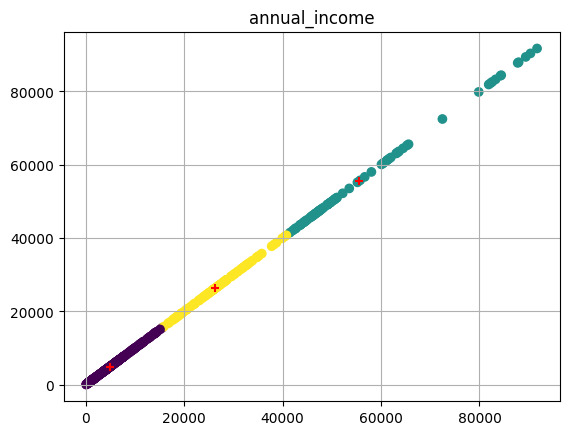

/tmp/ipykernel_17805/1766679979.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forExport[series_name][i] = labels[relab.get(forExport['cluster'][i])]
/home/viereck/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


youth_unemployment_rate


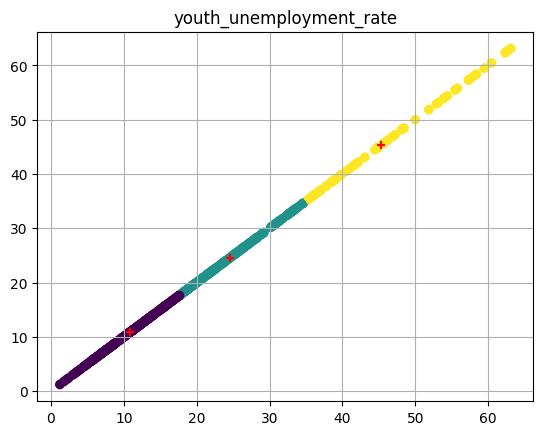

/tmp/ipykernel_17805/1766679979.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forExport[series_name][i] = labels[relab.get(forExport['cluster'][i])]
/home/viereck/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ischaemic_heart_diseas


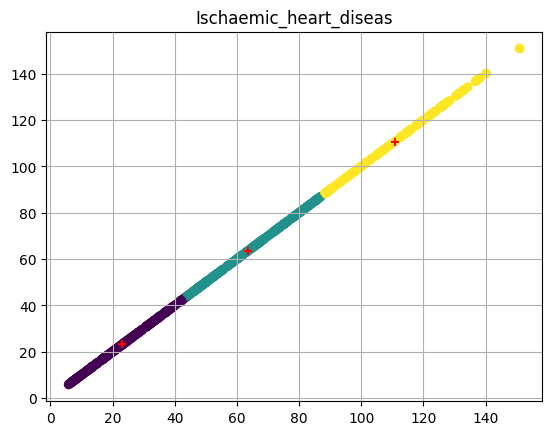

/tmp/ipykernel_17805/1766679979.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forExport[series_name][i] = labels[relab.get(forExport['cluster'][i])]
/home/viereck/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


circulatory_diseases


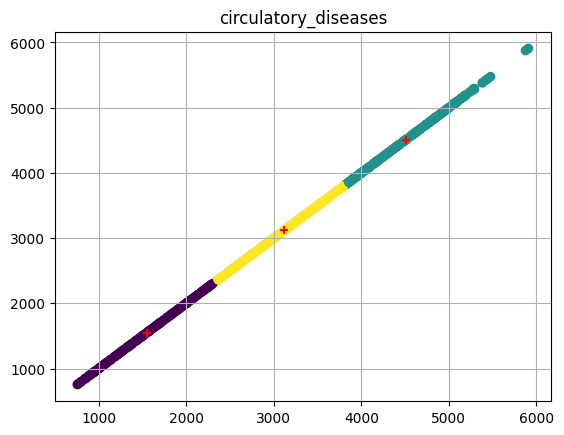

/tmp/ipykernel_17805/1766679979.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forExport[series_name][i] = labels[relab.get(forExport['cluster'][i])]
/home/viereck/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


self_injury


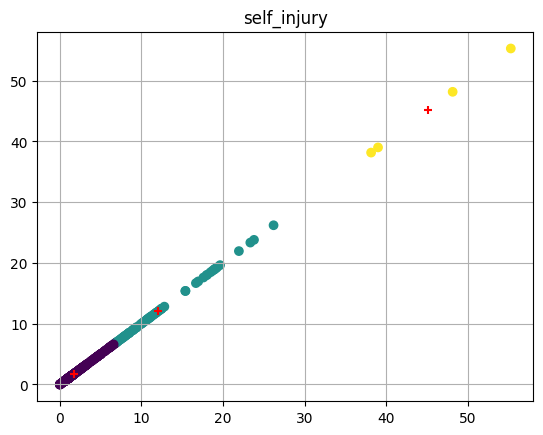

/tmp/ipykernel_17805/1766679979.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forExport[series_name][i] = labels[relab.get(forExport['cluster'][i])]
/home/viereck/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


total_hospital_beds


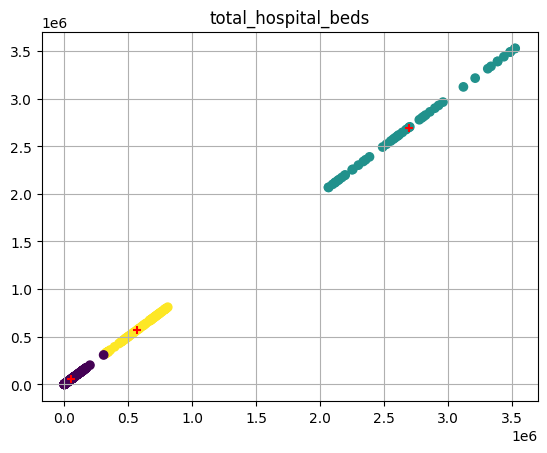

/tmp/ipykernel_17805/1766679979.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forExport[series_name][i] = labels[relab.get(forExport['cluster'][i])]
/home/viereck/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster


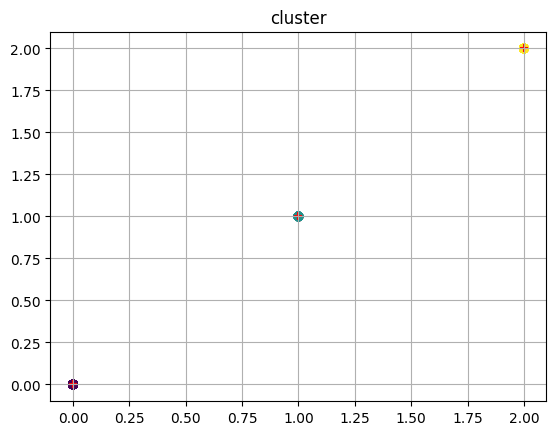

/tmp/ipykernel_17805/1766679979.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forExport[series_name][i] = labels[relab.get(forExport['cluster'][i])]


,COUNTRY,SEX,YEAR,life_expectancy,average_number_of_calories_available_per_person_per_day,unemployment_rate,regular_daily_smokers,adult_overweight,alcahol_consumption_liter_per_capita,fat_available_ppd,protein_ppd,average_fruit_vegtable_ppd,annual_income,youth_unemployment_rate,Ischaemic_heart_diseas,circulatory_diseases,self_injury,total_hospital_beds,cluster
0,Austria,ALL,2000.0,MEDIUM,LOW,LOW,MEDIUM,LOW,LOW,LOW,LOW,LOW,LOW,LOW,LOW,MEDIUM,LOW,LOW,LOW
1,Austria,ALL,2001.0,MEDIUM,LOW,LOW,HIGH,LOW,LOW,LOW,LOW,LOW,LOW,HIGH,LOW,MEDIUM,LOW,LOW,LOW
2,Austria,ALL,2002.0,MEDIUM,LOW,LOW,MEDIUM,LOW,LOW,LOW,LOW,LOW,LOW,HIGH,LOW,MEDIUM,LOW,LOW,LOW
3,Austria,ALL,2003.0,MEDIUM,LOW,LOW,HIGH,LOW,LOW,LOW,LOW,LOW,LOW,MEDIUM,LOW,MEDIUM,LOW,LOW,LOW
4,Austria,ALL,2004.0,MEDIUM,LOW,MEDIUM,HIGH,LOW,LOW,LOW,LOW,LOW,LOW,MEDIUM,LOW,MEDIUM,LOW,LOW,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,Sweden,ALL,2018.0,HIGH,HIGH,MEDIUM,LOW,HIGH,MEDIUM,HIGH,HIGH,LOW,HIGH,LOW,LOW,MEDIUM,LOW,MEDIUM,HIGH
554,Sweden,ALL,2019.0,HIGH,HIGH,MEDIUM,LOW,HIGH,MEDIUM,HIGH,HIGH,LOW,HIGH,LOW,LOW,MEDIUM,LOW,MEDIUM,HIGH
555,Sweden,ALL,2020.0,HIGH,HIGH,MEDIUM,HIGH,HIGH,MEDIUM,HIGH,HIGH,LOW,HIGH,LOW,LOW,MEDIUM,LOW,MEDIUM,HIGH
556,Sweden,ALL,2021.0,HIGH,HIGH,HIGH,MEDIUM,HIGH,MEDIUM,HIGH,HIGH,LOW,HIGH,LOW,LOW,MEDIUM,LOW,MEDIUM,HIGH


In [181]:
for series_name, series in df.items():
    if series_name == "COUNTRY" or series_name == "SEX" or series_name == "YEAR":
        continue
    print(series_name)
    y_pred = KMeans(n_clusters=3).fit(filterByYear[[series_name,series_name]])
    y_pred.predict(filterByYear[[series_name,series_name]])
    y_pred.cluster_centers_
    filterByYear["cluster"] = y_pred.labels_
    filterByYear[["COUNTRY","YEAR",series_name,"cluster"]].head()

    fig, ax = plt.subplots()
    ax.scatter(filterByYear[series_name], filterByYear[series_name], c=filterByYear["cluster"])
    ax.scatter(y_pred.cluster_centers_[:,1], y_pred.cluster_centers_[:,1], c='red', marker='+')
    ax.grid(True)
    ax.set_title(series_name)

    plt.show()

    relab = clusterToLabel(y_pred.cluster_centers_[:,1])

    for i in range(len(filterByYear[series_name])):
        forExport[series_name][i] = labels[relab.get(forExport['cluster'][i])]

forExport

In [182]:
rename_map = {
    "life_expectancy": "LIFEEXP",
    "average_number_of_calories_available_per_person_per_day": "CALORIES",
    "unemployment_rate": "UNEMP",
    "regular_daily_smokers": "SMOKING",
    "adult_overweight": "OVERWT",
    "alcahol_consumption_liter_per_capita": "ALCOHOL",
    "fat_available_ppd": "FAT",
    "protein_ppd": "PROTEIN",
    "average_fruit_vegtable_ppd": "FRUITVEG",
    "annual_income": "ANNUALINCOME",  
    "youth_unemployment_rate": "YOUTH_UNEMP_RATE",  
    "Ischaemic_heart_diseas": "HEARTDISEAS",  
    "circulatory_diseases": "CIRCULATORYDISEAS",  
    "self_injury": "SELFINJURY",  
    "total_hospital_beds": "TOTALHOSPBED"  
}

# item_cols = [c+"_bin" for c in cols_to_bin]
# print(item_cols)

forExport = forExport.rename(columns=rename_map)

# df = pd.DataFrame({"z":["a","a"], "zz":["b","c"]}, index=[1,2])

# Option 1 — transform all columns to "col=val" strings
# df_transformed = df.apply(lambda col: col.index.map(lambda i, c=col.name: f"{c}={col.loc[i]}"))
# but simpler:
forExport2 = forExport.apply(lambda col: col.map(lambda v, name=col.name: f"{name}={v}")).copy()

print(forExport2)

# 1 transaction = one (COUNTRY, YEAR)
tx_df = (forExport2.sort_values(["COUNTRY","YEAR"])
           .drop_duplicates(subset=["COUNTRY","YEAR"]))


transactions = forExport2#tx_df.apply(row_to_items, axis=1).tolist()
transactions = transactions.drop(columns=["COUNTRY","YEAR","SEX","cluster"])
num_records = len(transactions)
# print(transactions)
print("Transactions:", num_records)

pd.DataFrame(transactions).to_csv("rules_stat_cluster.csv", index=False)

             COUNTRY      SEX         YEAR         LIFEEXP       CALORIES  \
0    COUNTRY=Austria  SEX=ALL  YEAR=2000.0  LIFEEXP=MEDIUM   CALORIES=LOW   
1    COUNTRY=Austria  SEX=ALL  YEAR=2001.0  LIFEEXP=MEDIUM   CALORIES=LOW   
2    COUNTRY=Austria  SEX=ALL  YEAR=2002.0  LIFEEXP=MEDIUM   CALORIES=LOW   
3    COUNTRY=Austria  SEX=ALL  YEAR=2003.0  LIFEEXP=MEDIUM   CALORIES=LOW   
4    COUNTRY=Austria  SEX=ALL  YEAR=2004.0  LIFEEXP=MEDIUM   CALORIES=LOW   
..               ...      ...          ...             ...            ...   
553   COUNTRY=Sweden  SEX=ALL  YEAR=2018.0    LIFEEXP=HIGH  CALORIES=HIGH   
554   COUNTRY=Sweden  SEX=ALL  YEAR=2019.0    LIFEEXP=HIGH  CALORIES=HIGH   
555   COUNTRY=Sweden  SEX=ALL  YEAR=2020.0    LIFEEXP=HIGH  CALORIES=HIGH   
556   COUNTRY=Sweden  SEX=ALL  YEAR=2021.0    LIFEEXP=HIGH  CALORIES=HIGH   
557   COUNTRY=Sweden  SEX=ALL  YEAR=2022.0    LIFEEXP=HIGH  CALORIES=HIGH   

            UNEMP         SMOKING       OVERWT         ALCOHOL       FAT  \